In [1]:
from land_cover import load
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
# import spreg
from pysal.model import spreg
import statsmodels.formula.api as sm
from libpysal.weights import DistanceBand
from esda.moran import Moran
from splot.esda import moran_scatterplot

%load_ext autoreload
%autoreload 2

In [21]:
# I/O
resids_path_out = '/Volumes/metis/ABOVE3/land_cover_joins/out/shp/Efflux_Bogard_PLD_WBD_landCoverBuffers_core_tsFeatures_resids.shp'

In [2]:
df = load.loadLandCoverJoined()
df.head()

,Lake,Lat_DD,Lon_DD,AvgOfTempC,AvgOfpH,AvgOfALKum,AvgOfpCO2,StDevOfpCO,Name,Reference,...,Total_inun_RSD,Total_inun_dyn_pct,Hi_water_yr,Lo_water_yr,Dominant_veg_2014,Dominant_veg_group_2014,SDF,Perim_area_ratio,Total_inun_change,Total_inun_trend
0,11,59.334660,-135.903250,5.875000,7.575000,1088.91,3013.792349,3683.300556,EffluxLakes,NaN,...,NaN,NaN,1984,1984,Evergreen_Forest,Trees,2.743358,0.003187,0.0,no trend
1,14,55.586864,-131.541965,13.000000,6.700000,99.90,1127.437636,0.000000,EffluxLakes,NaN,...,NaN,NaN,1984,1984,Evergreen_Forest,Trees,2.478092,0.007212,0.0,no trend
2,15,55.614643,-131.488078,4.500000,5.950000,129.87,10676.132743,10700.356109,EffluxLakes,NaN,...,NaN,NaN,1984,1984,Evergreen_Forest,Trees,3.055633,0.008047,0.0,no trend
3,16,55.824914,-131.461970,6.833333,6.166667,26.64,1136.683363,919.559491,EffluxLakes,NaN,...,NaN,NaN,1984,1984,Evergreen_Forest,Trees,2.911182,0.005598,0.0,no trend
4,18,57.032997,-132.718380,6.750000,6.450000,169.83,3168.680857,758.979629,EffluxLakes,NaN,...,NaN,NaN,1984,1984,Evergreen_Forest,Trees,1.918614,0.004603,0.0,no trend


In [3]:
df.columns

Index(['Lake', 'Lat_DD', 'Lon_DD', 'AvgOfTempC', 'AvgOfpH', 'AvgOfALKum',
       'AvgOfpCO2', 'StDevOfpCO', 'Name', 'Reference', 'mean_bound',
       'max_bound_', 'Area_m2', 'Perim_m2', 'Total_inun_2014',
       'Trees_pct_2014', 'Shrubs_pct_2014', 'Wetlands_pct_2014',
       'Graminoid_pct_2014', 'Sparse_pct_2014', 'Littorals_pct_2014',
       'Littoral_wetland_pct_2014', 'Total_inun_RSD', 'Total_inun_dyn_pct',
       'Hi_water_yr', 'Lo_water_yr', 'Dominant_veg_2014',
       'Dominant_veg_group_2014', 'SDF', 'Perim_area_ratio',
       'Total_inun_change', 'Total_inun_trend'],
      dtype='object')

In [4]:
# df_numeric = df.select_dtypes(include='number').drop(columns=['Hi_water_yr', 'Lo_water_yr', 'Lake', 'StDevOfpCO'])
# df_numeric.dropna(subset='Shrubs_pct_2014', inplace=True)

# re-order
# first_columns = ['AvgOfpCO2', 'Lat_DD', 'Lon_DD', 'Area_m2', 'Perim_m2', 'mean_bound',
#        'max_bound_', 'Perim_area_ratio', 'SDF']
# [df_numeric.insert(0, col, df_numeric.pop(col)) for col in first_columns[-1::-1]] # re-order cols

load.sortColumns(df)
df_numeric = load.dropColumns(df)
df_numeric.head()

,AvgOfpCO2,Area_m2,Perim_m2,mean_bound,max_bound_,Perim_area_ratio,SDF,AvgOfpH,AvgOfALKum,AvgOfTempC,...,Wetlands_pct_2014,Graminoid_pct_2014,Sparse_pct_2014,Littorals_pct_2014,Littoral_wetland_pct_2014,Total_inun_RSD,Total_inun_dyn_pct,Hi_water_yr,Lo_water_yr,Total_inun_change
0,3013.792349,9.310143e+06,29673.279654,248.505609,653.312026,0.003187,2.743358,7.575000,1088.91,5.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984,1984,0.0
1,1127.437636,1.483463e+06,10699.430887,101.101048,295.273810,0.007212,2.478092,6.700000,99.90,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984,1984,0.0
2,10676.132743,1.812059e+06,14581.164723,88.491632,295.756856,0.008047,3.055633,5.950000,129.87,4.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984,1984,0.0
3,1136.683363,3.398303e+06,19024.151198,134.084065,402.394235,0.005598,2.911182,6.166667,26.64,6.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984,1984,0.0
4,3168.680857,2.183217e+06,10049.422216,165.172882,408.217614,0.004603,1.918614,6.450000,169.83,6.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984,1984,0.0


In [7]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AvgOfpCO2                  465 non-null    float64
 1   Area_m2                    465 non-null    float64
 2   Perim_m2                   465 non-null    float64
 3   mean_bound                 465 non-null    float64
 4   max_bound_                 465 non-null    float64
 5   Perim_area_ratio           465 non-null    float64
 6   SDF                        465 non-null    float64
 7   AvgOfpH                    308 non-null    float64
 8   AvgOfALKum                 308 non-null    float64
 9   AvgOfTempC                 308 non-null    float64
 10  Trees_pct_2014             388 non-null    float64
 11  Shrubs_pct_2014            388 non-null    float64
 12  Wetlands_pct_2014          388 non-null    float64
 13  Graminoid_pct_2014         388 non-null    float64

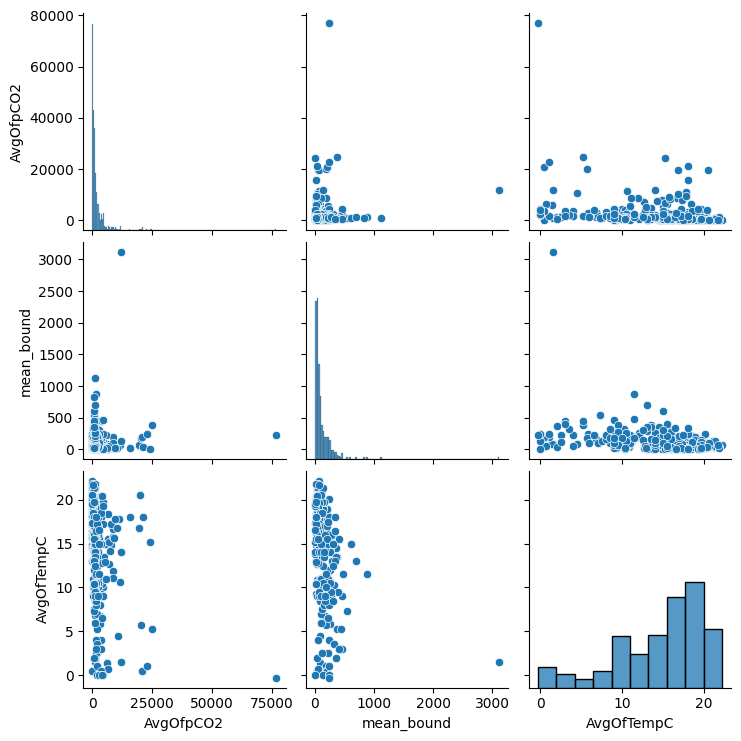

In [38]:
sns.pairplot(df[['AvgOfpCO2', 'mean_bound', 'AvgOfTempC']])

In [8]:
corr_matrix = df_numeric.corr()
corr_matrix

,AvgOfpCO2,Area_m2,Perim_m2,mean_bound,max_bound_,Perim_area_ratio,SDF,AvgOfpH,AvgOfALKum,AvgOfTempC,...,Wetlands_pct_2014,Graminoid_pct_2014,Sparse_pct_2014,Littorals_pct_2014,Littoral_wetland_pct_2014,Total_inun_RSD,Total_inun_dyn_pct,Hi_water_yr,Lo_water_yr,Total_inun_change
AvgOfpCO2,1.000000,0.057942,0.029909,0.096544,0.092829,0.008140,0.060459,-0.357337,0.180272,-0.289756,...,-0.093546,0.031670,0.156946,0.059308,0.004587,-0.010751,0.012383,-0.007325,0.016217,-0.010125
Area_m2,0.057942,1.000000,0.920580,0.758651,0.863365,-0.086989,0.444528,-0.093559,-0.022354,-0.163352,...,-0.079403,0.074566,0.131391,-0.073422,-0.104563,-0.036312,-0.046377,-0.006029,-0.034840,0.001418
Perim_m2,0.029909,0.920580,1.000000,0.591416,0.733795,-0.120023,0.568075,-0.157836,-0.058919,-0.219038,...,-0.113445,0.133986,0.213503,-0.147323,-0.212286,-0.077989,-0.099280,-0.033878,-0.064887,-0.004695
mean_bound,0.096544,0.758651,0.591416,1.000000,0.978907,-0.347322,0.221746,-0.249793,-0.118869,-0.328459,...,-0.259909,0.311223,0.428997,-0.309206,-0.438812,-0.161491,-0.207099,0.111820,0.004561,-0.023043
max_bound_,0.092829,0.863365,0.733795,0.978907,1.000000,-0.312013,0.332472,-0.224183,-0.105969,-0.299490,...,-0.231928,0.283008,0.385858,-0.284749,-0.402140,-0.144537,-0.186698,0.080177,-0.013670,-0.021984
Perim_area_ratio,0.008140,-0.086989,-0.120023,-0.347322,-0.312013,1.000000,-0.053501,0.223473,0.280829,0.195891,...,0.176325,-0.178676,-0.412108,0.757571,0.816351,0.349242,0.437322,-0.146643,-0.082696,0.018231
SDF,0.060459,0.444528,0.568075,0.221746,0.332472,-0.053501,1.000000,-0.061926,-0.065406,0.034713,...,0.119999,-0.065579,-0.106638,0.133434,0.064003,0.014497,0.044994,-0.053739,-0.049246,-0.007878
AvgOfpH,-0.357337,-0.093559,-0.157836,-0.249793,-0.224183,0.223473,-0.061926,1.000000,0.250547,0.558608,...,0.359340,-0.205870,-0.571481,0.098342,0.272756,0.156589,0.178558,-0.004256,0.135276,0.018178
AvgOfALKum,0.180272,-0.022354,-0.058919,-0.118869,-0.105969,0.280829,-0.065406,0.250547,1.000000,0.083304,...,0.086892,0.087501,-0.204288,0.240922,0.260518,0.111347,0.162782,-0.056131,-0.047041,-0.009348
AvgOfTempC,-0.289756,-0.163352,-0.219038,-0.328459,-0.299490,0.195891,0.034713,0.558608,0.083304,1.000000,...,0.405709,-0.321802,-0.604466,0.177763,0.328018,0.091051,0.117543,0.046237,0.031736,0.090198


<Axes: >

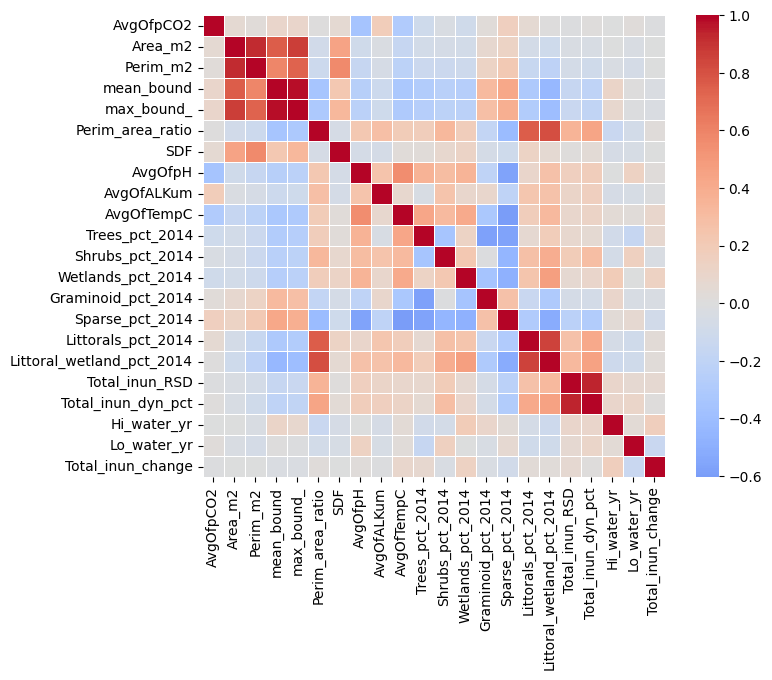

In [9]:
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=0) # optional upper diagonal mask
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5, mask=None) # mask=mask

# Regression

In [ ]:
f = ""
m1 = sm.ols(f, data=df).fit()

In [5]:
df_numeric['log_pco2'] = np.log(df_numeric['AvgOfpCO2'])

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_64660/3876516835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['log_pco2'] = np.log(df_numeric['AvgOfpCO2'])


In [6]:
df_drop = df_numeric.dropna()

In [7]:
# reg_vars = ['Area_m2', 'Perim_m2', 'mean_bound', 'max_bound_', 'Perim_area_ratio', 'SDF', 'AvgOfpH', 'AvgOfALKum', 'AvgOfTempC', 'Trees_pct_2014', 'Shrubs_pct_2014', 'Wetlands_pct_2014', 'Graminoid_pct_2014', 'Sparse_pct_2014', 'Littorals_pct_2014', 'Littoral_wetland_pct_2014', 'Total_inun_RSD', 'Total_inun_dyn_pct', 'Hi_water_yr', 'Lo_water_yr', 'Total_inun_change']
# reg_vars = ['Area_m2', 'Perim_m2', 'mean_bound', 'AvgOfpH', 'AvgOfALKum', 'AvgOfTempC', 'Trees_pct_2014', 'Wetlands_pct_2014', 'Littorals_pct_2014', 'Total_inun_dyn_pct', 'Hi_water_yr']
reg_vars = ['Area_m2', 'Perim_m2', 'mean_bound', 'AvgOfpH', 'AvgOfTempC', 'Trees_pct_2014', 'Wetlands_pct_2014', 'Littorals_pct_2014', 'Total_inun_dyn_pct', 'Hi_water_yr']

In [8]:
# var_names = [name.replace(' ', '_') for name in df_drop.columns]
# print(var_names)

In [9]:
# Fit OLS model
m1 = spreg.OLS(
    # Dependent variable
    df_drop[["log_pco2"]].values,
    # Independent variables
    df_drop[reg_vars].values,
    # Dependent variable name
    name_y="log_pco2",
    # Independent variable name
    name_x=reg_vars,
)
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :    log_pco2                Number of Observations:         274
Mean dependent var  :      6.4468                Number of Variables   :          11
S.D. dependent var  :      1.9826                Degrees of Freedom    :         263
R-squared           :      0.6981
Adjusted R-squared  :      0.6866
Sum squared residual:     323.921                F-statistic           :     60.8229
Sigma-square        :       1.232                Prob(F-statistic)     :   1.278e-62
S.E. of regression  :       1.110                Log likelihood        :    -411.719
Sigma-square ML     :       1.182                Akaike info criterion :     845.438
S.E of regression ML:      1.0873                Schwarz criterion     :     885.183

------------------------------------------------------------

Text(0, 0.5, 'log(pCO2)')

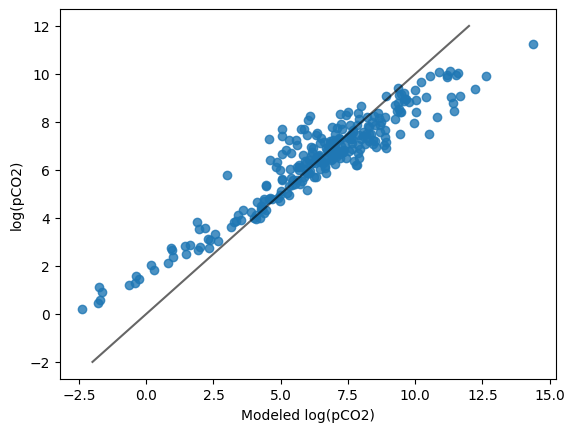

In [10]:
# View model scatter plot
# sns.residplot(m1.u
sns.regplot(x=df_drop[["log_pco2"]].values + m1.u, y=df_drop[["log_pco2"]].values, fit_reg=False)
plt.plot([-2, 12], [-2, 12], color='k', alpha=0.6)
plt.xlabel('Modeled log(pCO2)')
plt.ylabel('log(pCO2)')

In [15]:
## Add in lat/lon
df_resid = pd.concat((df_drop, df.loc[df_drop.index, ['Lat_DD',	'Lon_DD']]), axis=1, ignore_index=False)
df_resid['Residuals']= m1.u.reshape(m1.u.shape[0])
print(len(df_resid))
df_resid.head()
# 

274


,AvgOfpCO2,Area_m2,Perim_m2,mean_bound,max_bound_,Perim_area_ratio,SDF,AvgOfpH,AvgOfALKum,AvgOfTempC,...,Littoral_wetland_pct_2014,Total_inun_RSD,Total_inun_dyn_pct,Hi_water_yr,Lo_water_yr,Total_inun_change,log_pco2,Lat_DD,Lon_DD,Residuals
10,620.534070,6.393477e+04,1801.956938,21.010477,59.035250,0.028184,2.010346,8.46,3000.0,19.2,...,48.936170,0.010916,2.970297,1984,2012,-0.0075,6.430581,66.274062,-149.275313,0.434080
11,17.340716,1.260681e+04,478.808480,17.167836,45.406404,0.037980,1.202969,9.51,1199.0,17.3,...,65.714286,0.041560,9.523810,1984,2008,0.0000,2.853057,66.269203,-149.285903,-1.230061
12,627.047152,3.124697e+05,3846.684550,52.082009,155.596088,0.012311,1.941233,8.43,2957.0,15.5,...,25.458716,0.004584,1.388889,1995,2013,0.0000,6.441022,66.284951,-149.278303,0.464701
13,260.130692,2.305220e+06,14585.496572,139.450020,475.727344,0.006327,2.709943,8.43,1164.0,19.8,...,18.492696,0.004514,1.401515,2012,1984,0.0675,5.561184,66.282350,-149.321430,-0.111922
14,860.962546,1.530886e+05,2157.998288,56.031031,158.196028,0.014096,1.555875,8.08,1789.0,15.7,...,46.027397,0.042327,20.408163,2009,2007,-0.0300,6.758051,66.118038,-149.105985,-0.011181


In [16]:
df_resid[['Lat_DD',	'Lon_DD']]
# df[['Lat_DD',	'Lon_DD']]
# df.loc[df_drop.index, ['Lat_DD',	'Lon_DD']]
# df_drop

,Lat_DD,Lon_DD
10,66.274062,-149.275313
11,66.269203,-149.285903
12,66.284951,-149.278303
13,66.282350,-149.321430
14,66.118038,-149.105985
...,...,...
304,70.183065,-148.215785
305,69.294080,-150.200120
306,66.278382,-145.682049
307,66.271790,-145.696248


Write out resids

In [22]:
gdf_resid = gpd.GeoDataFrame(df_resid, geometry=gpd.points_from_xy(df_resid['Lon_DD'], df_resid['Lat_DD']), crs="EPSG:4326")
gdf_resid.to_file(resids_path_out)

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_64660/3139808547.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_resid.to_file(resids_path_out)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Perim_area_ratio' to 'Perim_area'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Trees_pct_2014' to 'Trees_pct_'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Shrubs_pct_2014' to 'Shrubs_pct'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Wetlands_pct_2014' to 'Wetlands_p'
  ogr_write(
/Users/ekyzivat/mambaforge/envs

<Axes: ylabel='Frequency'>

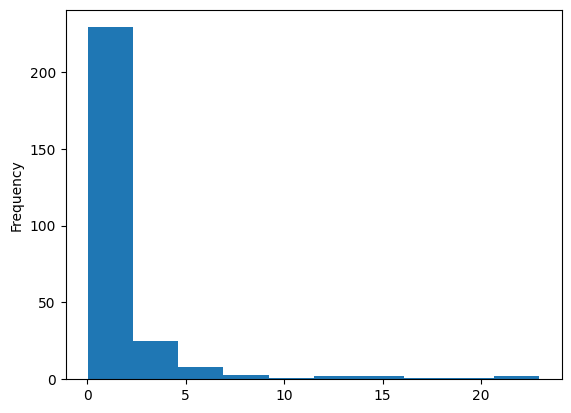

In [25]:
gdf_resid['exp_residuals'] = np.exp(gdf_resid.Residuals)
gdf_resid['exp_residuals'].plot.hist()

Moran's on resids

In [ ]:
# Resids df took wrong locs from index somehow and filled lat/lon with nans...

In [17]:
w = DistanceBand(df_resid[['Lat_DD',	'Lon_DD']].values, 30., binary=False) # not projected, one degree max leads to islands
w.transform = 'R'

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


In [18]:
# Copied from autocrrelation.ipynb
def analyze_moran(gdf, w, variable):
    # Compute Moran's I
    y = gdf[variable].values
    moran = Moran(y, w)

    # Print Moran's I results
    print(f"Moran's I: {moran.I}")
    print(f"p-value: {moran.p_sim}")
    print(f"z-score: {moran.z_sim}")

    # Moran scatter plot
    fig, ax = moran_scatterplot(moran,
                                aspect_equal=True)
    plt.title(f"Moran's I Scatter Plot for {variable}")
    plt.show()

Moran's I: 0.18314572210377353
p-value: 0.001
z-score: 10.776949864305877


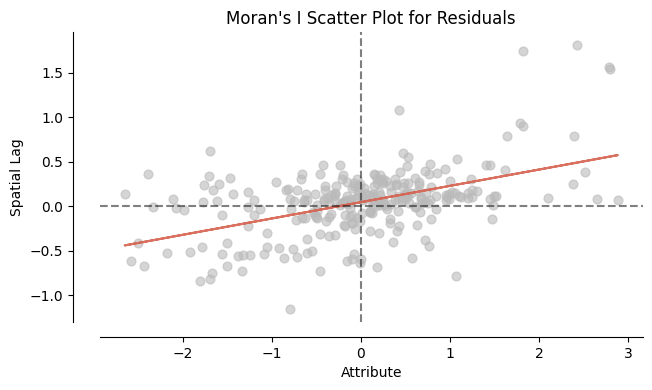

In [19]:
analyze_moran(df_resid, w, 'Residuals')